<a href="https://colab.research.google.com/github/AriesAnon/i-SenseCNN/blob/main/PrefinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PreFinal Model Multi-Class Transfer Learning Using The Inception V3**

# **Status: Success 😁**

References:

[YouTube]('https://www.youtube.com/watch?v=LsdxvjLWkIY&ab_channel=codebasics')

[GitHub]('https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb')

Note:
This is a cleaned version of the previous test [(link on GitHub)]('https://github.com/AriesAnon/i-SenseCNN/blob/main/Multiclass_Test.ipynb')

*This cell is copied from the very last cell for convenience's sake*

# **Conclusion: Transfer Learning Success**

***For a more higher accuracy, consider adding more data into the dataset as well as increasing the number of epochs. For now, it successfully predicted a foreign image (image not in the dataset). This will also increase the training time especially if all of the common meat cuts where included. Consider doing this ASAP.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_short_ribs': 0,
    'beef_sirloin_unfinished': 1,
    'chicken_breast': 2,
    'chicken_feet': 3,
    'chicken_leg': 4,
    'pork_ribs': 5,
}
```

Therefore, since the image is chicken breast and the result is array[2], the prediction is correct.

To do: 
*   Export the model and try to run it using the Raspberry Pi. Buy meat cuts that are present in the dataset and try to compare the result.
*   Create a class that will automatically normalise images into the appropriate size and shape. 

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import shutil
from os import getcwd
#import pathlib

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Importing the Dataset**

In [ ]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/MyDrive/CNNRelatedFolders/Datasets/PreFinalDataset.zip"

In [ ]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall('../content/')  # added a path to extract all of the files in the dataset zip
  print('Done')


Done


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/PreFinalDataset')
data_dir


PosixPath('/content/PreFinalDataset')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/PreFinalDataset/chicken_breast/159.jpg'),
 PosixPath('/content/PreFinalDataset/chicken_breast/117.jpg'),
 PosixPath('/content/PreFinalDataset/chicken_breast/88.jpg'),
 PosixPath('/content/PreFinalDataset/chicken_breast/310.jpg'),
 PosixPath('/content/PreFinalDataset/chicken_breast/216.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2818


In [ ]:
beef_short_ribs = list(data_dir.glob('beef_short_ribs/*'))
beef_short_ribs[:5]

[PosixPath('/content/PreFinalDataset/beef_short_ribs/106.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/180.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/159.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/117.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/310.jpg')]

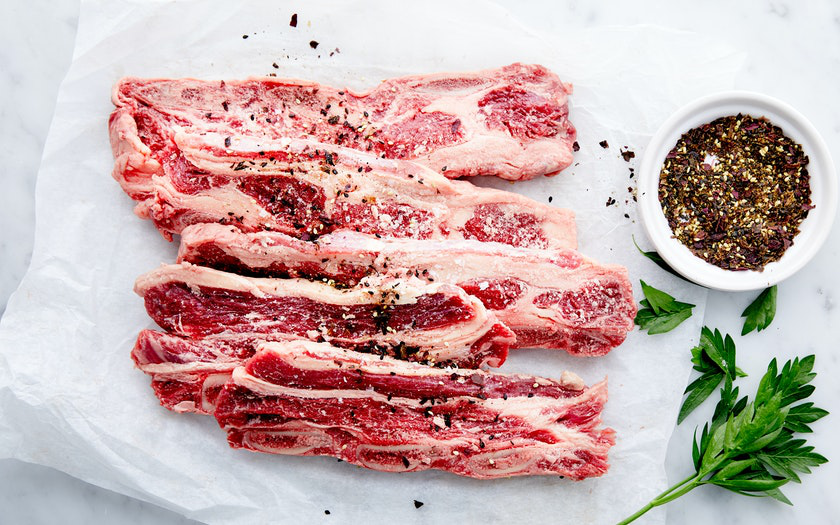

In [ ]:
Image.open(str(beef_short_ribs[1]))

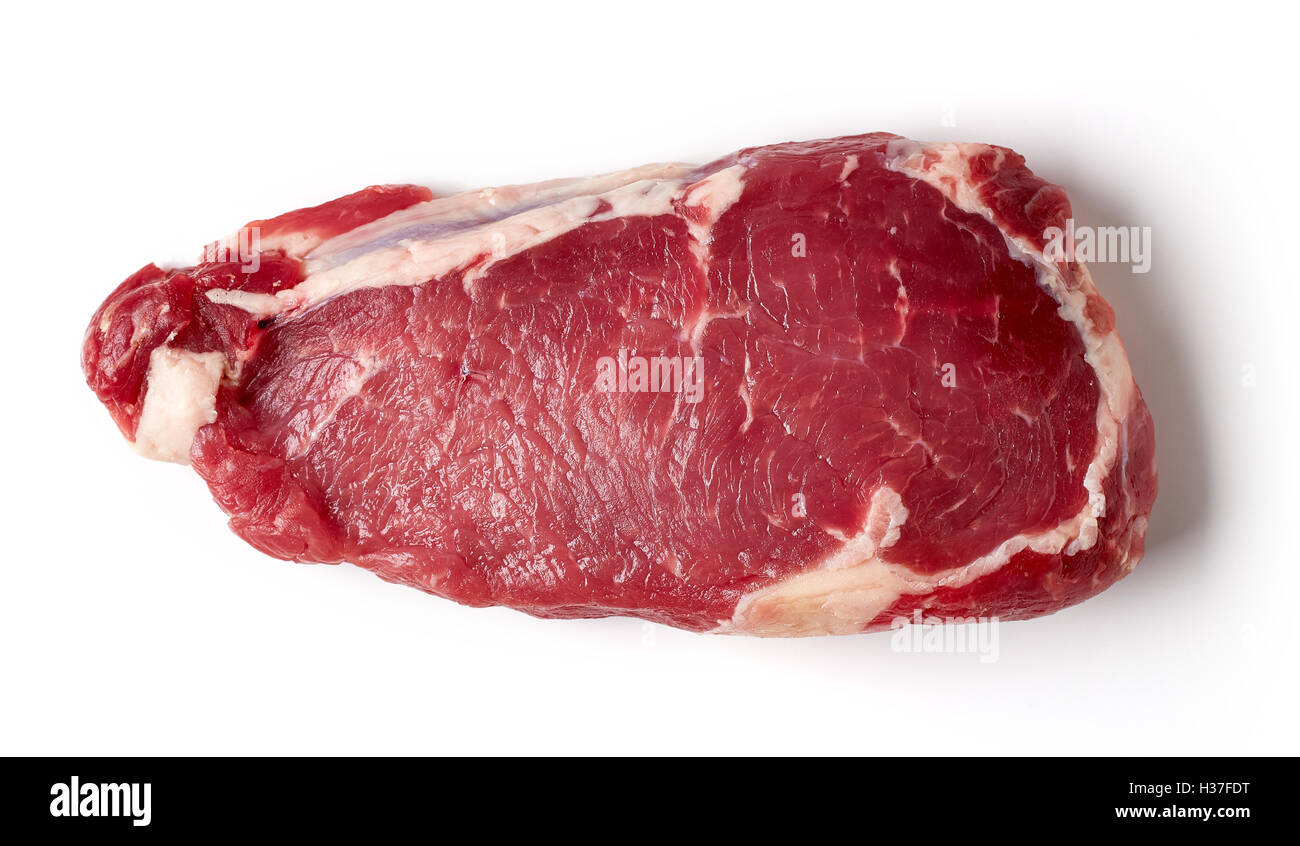

In [ ]:
beef_sirloin_unfinished = list(data_dir.glob('beef_sirloin/*'))
Image.open(str(beef_sirloin_unfinished[0]))

In [ ]:
meat_images_dict = {
    'beef_cubes': list(data_dir.glob('beef_cubes/*')),
    'beef_shank': list(data_dir.glob('beef_shank/*')),
    'beef_short_ribs': list(data_dir.glob('beef_short_ribs/*')),
    'beef_sirloin': list(data_dir.glob('beef_sirloin/*')),
    'chicken_breast': list(data_dir.glob('chicken_breast/*')),
    'chicken_feet': list(data_dir.glob('chicken_feet/*')),
    'chicken_leg': list(data_dir.glob('chicken_leg/*')),
    'chicken_lollipop': list(data_dir.glob('chicken_lollipop/*')),
    'chicken_neck': list(data_dir.glob('chicken_neck/*')),
    'chicken_thigh': list(data_dir.glob('chicken_thigh/*')),
    'chicken_wings': list(data_dir.glob('chicken_wings/*')),
    'pork_pata': list(data_dir.glob('pork_pata/*')),
    'pork_ribs': list(data_dir.glob('pork_ribs/*')),
    'porkchop': list(data_dir.glob('porkchop/*')),
}

In [ ]:
meat_labels_dict = {
    'beef_cubes': 0,
    'beef_shank': 1,
    'beef_short_ribs': 2,
    'beef_sirloin': 3,
    'chicken_breast': 4,
    'chicken_feet': 5,
    'chicken_leg': 6,
    'chicken_lollipop': 7,
    'chicken_neck': 8,
    'chicken_thigh': 9,
    'chicken_wings': 10,
    'pork_pata': 11,
    'pork_ribs': 12,
    'porkchop': 13,
}

In [ ]:
meat_images_dict['beef_short_ribs'][:5]

[PosixPath('/content/PreFinalDataset/beef_short_ribs/106.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/180.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/159.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/117.jpg'),
 PosixPath('/content/PreFinalDataset/beef_short_ribs/310.jpg')]

In [ ]:
str(meat_images_dict['beef_short_ribs'][0])

'/content/PreFinalDataset/beef_short_ribs/106.jpg'

In [ ]:
img = cv2.imread(str(meat_images_dict['beef_short_ribs'][0]))

In [ ]:
img.shape

(601, 612, 3)

In [ ]:
IMAGE_SHAPE = (299, 299)
cv2.resize(img,(IMAGE_SHAPE)).shape

(299, 299, 3)

In [ ]:
X, y = [], []

for meat_name, images in meat_images_dict.items():
    for image in images:
        print(image) #for checking for broken images; NOTE: delete broken images in the dataset
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(meat_labels_dict[meat_name])

/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2012_51_82310.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2013_37_30015.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2012_51_8239.jpg
/content/PreFinalDataset/beef_cubes/149.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2013_37_2956.jpg
/content/PreFinalDataset/beef_cubes/52.jpg
/content/PreFinalDataset/beef_cubes/150.jpg
/content/PreFinalDataset/beef_cubes/76.jpg
/content/PreFinalDataset/beef_cubes/93.jpg
/content/PreFinalDataset/beef_cubes/42.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2014_31_2874.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2013_16_5019.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2014_13_0049.jpg
/content/PreFinalDataset/beef_cubes/20.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2013_37_2900.jpg
/content/PreFinalDataset/beef_cubes/IMG_COM_20220403_2013_16_50213.jpg
/content/PreFinalDataset/beef_cubes/147.jpg
/content/PreFinalDat

# **If there is an error (~215: Assertion Failed) during the resizing of images, add the following code:**
Use this code to see the image name and path of the image that is causing problem.
`
print(image) #for checking for broken images; NOTE: delete broken images in the dataset
`

To delete broken images, use the following code instead of deleting it directly from the Files Navigation Menu. `
os.remove('image_path')
`

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# **Training the new model**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [ ]:
num_of_meat = 14

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_meat)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 14)                28686     
                                                                 
Total params: 21,831,470
Trainable params: 28,686
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
67/67 [==============================] - 433s 6s/step - loss: 1.9838 - acc: 0.3905
Epoch 2/20
67/67 [==============================] - 427s 6s/step - loss: 1.1495 - acc: 0.6901
Epoch 3/20
67/67 [==============================] - 427s 6s/step - loss: 0.9118 - acc: 0.7426
Epoch 4/20
67/67 [==============================] - 428s 6s/step - loss: 0.7698 - acc: 0.7825
Epoch 5/20
67/67 [==============================] - 428s 6s/step - loss: 0.6597 - acc: 0.8190
Epoch 6/20
67/67 [==============================] - 427s 6s/step - loss: 0.5919 - acc: 0.8420
Epoch 7/20
67/67 [==============================] - 430s 6s/step - loss: 0.5259 - acc: 0.8654
Epoch 8/20
67/67 [==============================] - 424s 6s/step - loss: 0.4781 - acc: 0.8823
Epoch 9/20
67/67 [==============================] - 423s 6s/step - loss: 0.4284 - acc: 0.9044
Epoch 10/20
67/67 [==============================] - 422s 6s/step - loss: 0.3991 - acc: 0.9105
Epoch 11/20
67/67 [==============================] - 423s 6

In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 152s 7s/step - loss: 0.8168 - acc: 0.7201


[0.8167709112167358, 0.7201125025749207]

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 81%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 80%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 93%)


In [ ]:
model.save('my_model.h5')

In [ ]:
get_config(self)

# **Testing the model with a foreign image**

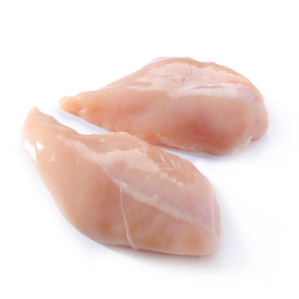

In [ ]:
chicken_breast_image_test = Image.open('/content/drive/MyDrive/CNNRelatedFolders/Test Images/chicken_breast.jpg').resize(IMAGE_SHAPE)
chicken_breast_image_test

In [ ]:
chicken_breast_image_test = np.array(chicken_breast_image_test)/255.0
chicken_breast_image_test.shape

(299, 299, 3)

In [ ]:
predicted = model.predict(chicken_breast_image_test[np.newaxis, ...])
predicted = np.argmax(predicted, axis=1)
predicted

array([4])

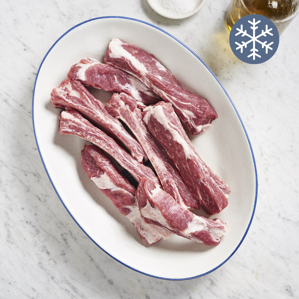

In [ ]:
pork_ribs_image_test = Image.open('/content/drive/MyDrive/CNNRelatedFolders/Test Images/pork_ribs.jpg').resize(IMAGE_SHAPE)
pork_ribs_image_test

In [ ]:
pork_ribs_image_test = np.array(pork_ribs_image_test)/255.0
pork_ribs_image_test.shape

(299, 299, 3)

In [ ]:
predicted = model.predict(pork_ribs_image_test[np.newaxis, ...])
predicted = np.argmax(predicted, axis=1)
predicted

array([8])

# **Conclusion: Transfer Learning Success**

***For a more higher accuracy, consider adding more data into the dataset as well as increasing the number of epochs. For now, it successfully predicted a foreign image (image not in the dataset). This will also increase the training time especially if all of the common meat cuts where included. Consider doing this ASAP.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_short_ribs': 0,
    'beef_sirloin_unfinished': 1,
    'chicken_breast': 2,
    'chicken_feet': 3,
    'chicken_leg': 4,
    'pork_ribs': 5,
}
```

Therefore, since the image is chicken breast and the result is array[2], the prediction is correct.

To do: 
*   Export the model and try to run it using the Raspberry Pi. Buy meat cuts that are present in the dataset and try to compare the result.
*   Create a class that will automatically normalise images into the appropriate size and shape. 